## ipyvolume

In [ ]:
!pip install ipyvolume

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.7/260.7 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 271.7/271.7 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.3 MB/s eta 0:00:00


In [ ]:
import ipyvolume as ipv
import numpy as np
N = 1000
x, y, z = np.random.normal(0, 1, (3, N))

In [ ]:
#ipv.scatter()

fig = ipv.figure()
scatter = ipv.scatter(x, y, z)
ipv.show()

Html(layout=None, style_='display: none', tag='span')

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

## Bokeh

In [7]:
# Bokeh Libraries

import pandas as pd
df = pd.read_csv('https://anvil.works/blog/img/plotting-in-python/uk-election-results.csv')

In [9]:
df

,year,conservative,labour,liberal,others
0,1966,253,364,12,1
1,1970,330,287,6,7
2,Feb 1974,297,301,14,18
3,Oct 1974,277,313,13,32
4,1979,339,269,11,16
5,1983,397,209,23,6
6,1987,376,229,22,23
7,1992,336,271,20,23
8,1997,165,418,46,22
9,2001,166,412,52,29


In [31]:
from bokeh.sampledata.autompg import autompg_clean as autompg_df

In [27]:
autompg_df.head()


,mpg,cyl,displ,hp,weight,accel,yr,origin,name,mfr
0,18.0,8,307.0,130,3504,12.0,70,North America,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,North America,buick skylark 320,buick
2,18.0,8,318.0,150,3436,11.0,70,North America,plymouth satellite,plymouth
3,16.0,8,304.0,150,3433,12.0,70,North America,amc rebel sst,amc
4,17.0,8,302.0,140,3449,10.5,70,North America,ford torino,ford


In [33]:
from bokeh.palettes import Viridis256
from bokeh.util.hex import hexbin

# Creating data
# Generating n (50000) random x and y points with normal distribution
n = 50000
x = np.random.standard_normal(n)
y = np.random.standard_normal(n)

# Hexbin creation and hexagonal cell edge length definition
bins = hexbin(x, y, 0.1)

# With bins.counts we get the number of dots in each hexagonal cell.
# We normalize these numbers (divide by the maximum number of dots) to the range 0-255.
# Then we select the colors corresponding to these values from the Viridis256 color palette.
color = [Viridis256[int(i)] for i in bins.counts/max(bins.counts)*255]

# Creates a figure for bokeh
p = figure(tools="wheel_zoom,reset", match_aspect=True, background_fill_color='#440154')
p.grid.visible = False

# Plotting the Hexbin graph
p.hex_tile(bins.q, bins.r, size=0.1, line_color=None, fill_color=color)

# Shows the graph
show(p)

In [38]:
from bokeh.palettes import Viridis256
from bokeh.util.hex import hexbin
from bokeh.plotting import figure, show
import numpy as np

def plot_hexbin(x, y, bin_size=0.1):
    # Hexbin creation and hexagonal cell edge length definition
    bins = hexbin(x, y, bin_size)

    # With bins.counts we get the number of dots in each hexagonal cell.
    # We normalize these numbers (divide by the maximum number of dots) to the range 0-255.
    # Then we select the colors corresponding to these values from the Viridis256 color palette.
    color = [Viridis256[int(i)] for i in bins.counts / max(bins.counts) * 255]

    # Creates a figure for bokeh
    p = figure(tools="wheel_zoom,reset", match_aspect=True, background_fill_color='#440154')
    p.grid.visible = False

    # Plotting the Hexbin graph
    p.hex_tile(bins.q, bins.r, size=bin_size, line_color=None, fill_color=color)

    # Shows the graph
    show(p)

# Example usage:
n = 50000
x = np.random.standard_normal(n)
y = np.random.standard_normal(n)

plot_hexbin(x, y, bin_size=0.05)


In [39]:
# Creates a new drawing using the figure dimensions
p = figure(width=400, height=400)

# Privatisations other than the graphic
p.outline_line_width = 7
p.outline_line_alpha = 0.3
p.outline_line_color = "red"

# Creating data
x = [2, 4, 6, 8, 10]
y = [12, 8, 4, 16, 18]

# Creates the Glyph chart
r = p.circle(x, y)

# The size of the apartment is adjusted
r.glyph.size = 50

# The transparency of the interior colour of the apartment is adjusted
r.glyph.fill_alpha = 0.2

# The colour of the edge line of the circle is set
r.glyph.line_color = "firebrick"

# The shape of the edge line of the circle (line_dash) and
# Adjust the length of lines and spaces [5, 1]
r.glyph.line_dash = [5, 1]

# Adjust the thickness of the edge line of the circle
r.glyph.line_width = 2

# Shows the graph
show(p)

In [42]:
import bokeh.sampledata
bokeh.sampledata.download()

Creating /root/.bokeh directory
Creating /root/.bokeh/data directory
Using data directory: /root/.bokeh/data
Fetching 'CGM.csv'
Downloading: CGM.csv (1589982 bytes)
 1589982   [100.00%%]
Fetching 'US_Counties.zip'
Downloading: US_Counties.zip (3171836 bytes)
 3171836   [100.00%%]
Unpacking: US_Counties.csv
Fetching 'us_cities.json'
Downloading: us_cities.json (713565 bytes)
 713565    [100.00%%]
Fetching 'unemployment09.csv'
Downloading: unemployment09.csv (253301 bytes)
 253301    [100.00%%]
Fetching 'AAPL.csv'
Downloading: AAPL.csv (166698 bytes)
 166698    [100.00%%]
Fetching 'FB.csv'
Downloading: FB.csv (9706 bytes)
 9706      [100.00%%]
Fetching 'GOOG.csv'
Downloading: GOOG.csv (113894 bytes)
 113894    [100.00%%]
Fetching 'IBM.csv'
Downloading: IBM.csv (165625 bytes)
 165625    [100.00%%]
Fetching 'MSFT.csv'
Downloading: MSFT.csv (161614 bytes)
 161614    [100.00%%]
Fetching 'WPP2012_SA_DB03_POPULATION_QUINQUENNIAL.zip'
Downloading: WPP2012_SA_DB03_POPULATION_QUINQUENNIAL.zip (48

In [43]:
# A tool used to display an interactive legend when hovering over data points.
from bokeh.models.tools import HoverTool
from bokeh.sampledata.glucose import data

# From the "glucose" dataset we select the data from 2010-10-06
subset = data.loc['2010-10-06']

# We assign the timestamp (index) values of the selected data to variable x and
# the values in the 'glucose' column to variable y
x, y = subset.index.to_series(), subset['glucose']

# We create a 600 x 300 pixel drawing area (figure).
# The parameter x_axis_type="datetime" specifies that the x-axis is interpreted as a timestamp.
# We also add a title to the drawing area.
p = figure(width=600, height=300, x_axis_type="datetime", title='Hover over points')

# We add a line graph to the drawing area using the line function.
# The x and y variables specify the x and y coordinates of the line.
# We set the line with a dashed pattern with the line_dash parameter,
# the line thickness with the line_width parameter,
# and the line color with the color parameter.
p.line(x, y, line_dash="4 4", line_width=1, color='gray')

# We add circle glyphs to the drawing area using the function
# The x and y variables specify the center coordinates of the circles.
# the size of the circles with the size parameter,
# fill color with fill_color parameter,
# hover_fill_color parameter to set the hover fill color,
# fill transparency with the fill_alpha parameter,
# hover transparency on mouseover with the hover_alpha parameter,
# set the color of the border line with the line_color parameter
# with the hover_line_color parameter we set the color of the border on mouseover.
# With the circle function, we return an object of type GlyphRenderer and assign it to the variable cr.
cr = p.circle(x, y, size=20,
              fill_color="grey", hover_fill_color="firebrick",
              fill_alpha=0.05, hover_alpha=0.3,
              line_color=None, hover_line_color="white")

# with tooltips=None parameter you specify that annotations are not displayed.
# renderers parameter to specify which images (GlyphRenderers)
# we specify to connect to this tool
# with the parameter mode='hline' we specify that the annotations are displayed in a horizontal line mode.
p.add_tools(HoverTool(tooltips=None, renderers=[cr], mode='hline'))

# Shows the graph
show(p)

In [44]:
from bokeh.sampledata.autompg import autompg
from bokeh.models import LinearColorMapper, ColorBar, HoverTool
from bokeh.transform import transform
from bokeh.plotting import figure, show
from bokeh.models.sources import ColumnDataSource

source = ColumnDataSource(autompg)
color_mapper = LinearColorMapper(palette="Viridis256", low=autompg.weight.min(), high=autompg.weight.max())

p = figure(x_axis_label='Horsepower', y_axis_label='MPG', tools='hover', toolbar_location=None)
p.circle(x='hp', y='mpg', color=transform('weight', color_mapper), size=20, alpha=0.6, source=autompg)

color_bar = ColorBar(color_mapper=color_mapper, label_standoff=12, location=(0,0), title='Weight')
p.add_layout(color_bar, 'right')

hover = p.select_one(HoverTool)
hover.tooltips = [('MPG', '@mpg'), ('Horsepower', '@hp'), ('Weight', '@weight')]

show(p)

## NetworkX

In [73]:
import matplotlib.pyplot as plt

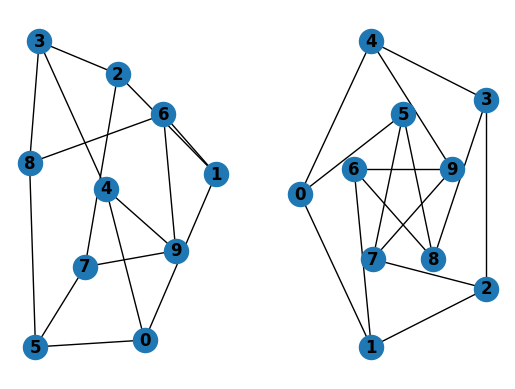

In [75]:
import networkx as nx

G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

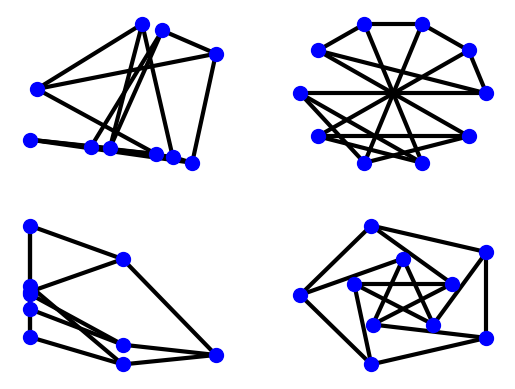

In [77]:
options = {
    'node_color': 'blue',
    'node_size': 100,
    'width': 3,
}


subax1 = plt.subplot(221)
nx.draw_random(G, **options)
subax2 = plt.subplot(222)
nx.draw_circular(G, **options)
subax3 = plt.subplot(223)
nx.draw_spectral(G, **options)
subax4 = plt.subplot(224)
nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)

[REF](https://https://networkx.org/documentation/stable/tutorial.html)

In [ ]:
# to add
https://datascientest.com/networkx-tout-savoir